In [20]:
# @title Welcome

from IPython.display import HTML

HTML('''
<div style="padding: 20px; background: linear-gradient(90deg, #a64ac9, #ff66b2); color: white; text-align: center; border-radius: 10px; font-size: 28px; font-weight: bold;">
  iAAA: Mathematics for Machine Learning
</div>
''')

### 📝 Notebook Topic: *Inferential & Discriptive Statistics*  
👨‍🏫 Lecturer: *Hadi Asheri*  
📅 Date: *[YYYY-MM-DD]*  

---

In [21]:
# @title Section 1: One-Sample T-Test
from IPython.display import HTML

HTML('''
<div style="padding: 12px; background: linear-gradient(to right, #c471ed, #f7797d); color: white; font-size: 22px; border-radius: 8px; margin-top: 20px;">
  📘 Section 1: One-Smaple T-Test
</div>
''')

<h1 style='text-align: left;'>
One-Sample t-test
</h1>
<h3 style='text-align: left;'>
The concept of a One-Sample t-test using the famous Iris dataset: We will test whether the mean petal length of the setosa species significantly differs from a hypothesized population mean.
</h3>

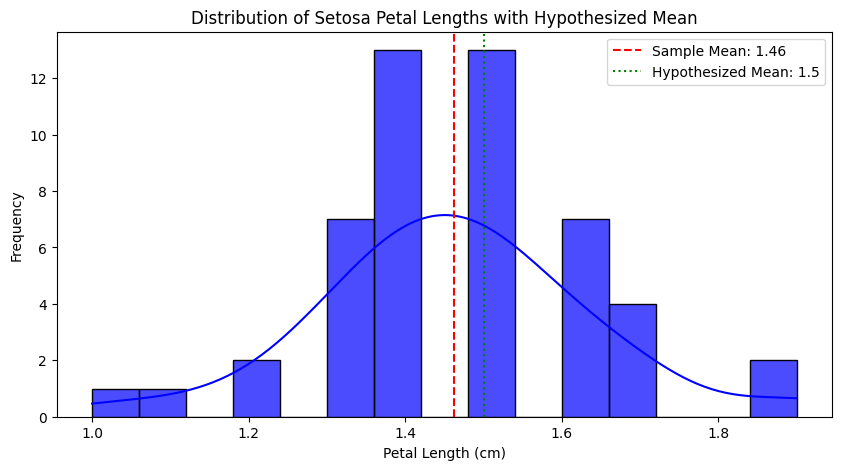

T-Statistic: -1.5472
P-Value: 0.1282
Conclusion: Fail to reject H0 (No significant difference)


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Select only the Setosa species
setosa = df[df['species'] == 0]  # 0 corresponds to Setosa in the dataset
petal_length_sample = setosa['petal length (cm)']

# Hypothesis Testing
# H0: The mean petal length of Setosa is equal to 1.5 cm (arbitrary hypothesized mean)
hypothesized_mean = 1.5

# Perform One-Sample t-test
t_statistic, p_value = ttest_1samp(petal_length_sample, hypothesized_mean)

# Visualization
plt.figure(figsize=(10, 5))
sns.histplot(petal_length_sample, bins=15, kde=True, color='blue', alpha=0.7)
plt.axvline(petal_length_sample.mean(), color='red', linestyle='dashed', label=f"Sample Mean: {petal_length_sample.mean():.2f}")
plt.axvline(hypothesized_mean, color='green', linestyle='dotted', label=f"Hypothesized Mean: {hypothesized_mean}")
plt.legend()
plt.xlabel("Petal Length (cm)")
plt.ylabel("Frequency")
plt.title("Distribution of Setosa Petal Lengths with Hypothesized Mean")
plt.show()

# Print Results
print(f"T-Statistic: {t_statistic:.4f}")
print(f"P-Value: {p_value:.4f}")

# Decision Rule (Significance Level α = 0.05)
alpha = 0.05
if p_value < alpha:
    print("Conclusion: Reject H0 (The mean petal length is significantly different from 1.5 cm)")
else:
    print("Conclusion: Fail to reject H0 (No significant difference)")


<h1 style='text-align: left;'>
One-Sample t-test
</h1>
<h3 style='text-align: left;'>
The concept of a One-Sample t-test using a real machine learning dataset: We will use the famous California  Housing dataset from Scikit-learn, where we'll test whether the mean house price (MEDV) significantly differs from a hypothesized population mean.</h3>

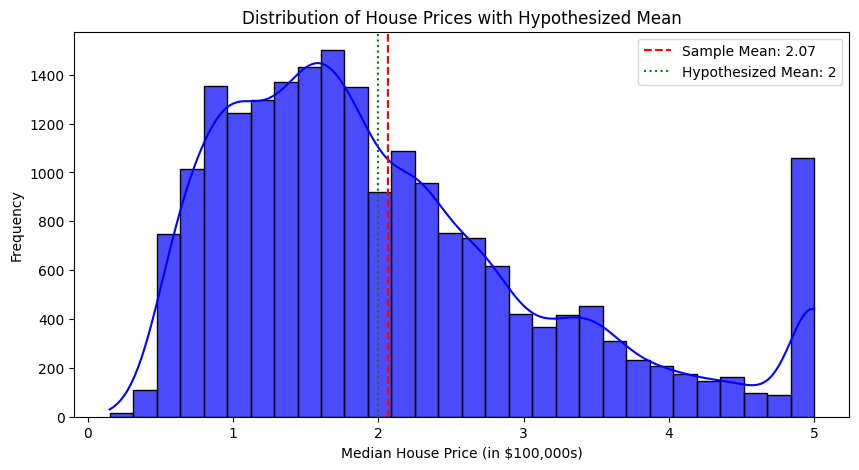

T-Statistic: 8.5354
P-Value: 0.0000
Conclusion: Reject H0 (The mean house price is significantly different from $200,000)


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp
from sklearn.datasets import fetch_california_housing

# Load the California Housing dataset
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)

# Add target variable (median house price in $100,000s)
df['MEDV'] = california.target

# Hypothesis Testing
# H0: The mean of MEDV is equal to 2 (arbitrary hypothesized mean, equivalent to $200,000)
hypothesized_mean = 2
sample = df['MEDV']

# Perform One-Sample t-test
t_statistic, p_value = ttest_1samp(sample, hypothesized_mean)

# Visualization
plt.figure(figsize=(10, 5))
sns.histplot(sample, bins=30, kde=True, color='blue', alpha=0.7)
plt.axvline(sample.mean(), color='red', linestyle='dashed', label=f"Sample Mean: {sample.mean():.2f}")
plt.axvline(hypothesized_mean, color='green', linestyle='dotted', label=f"Hypothesized Mean: {hypothesized_mean}")
plt.legend()
plt.xlabel("Median House Price (in $100,000s)")
plt.ylabel("Frequency")
plt.title("Distribution of House Prices with Hypothesized Mean")
plt.show()

# Print Results
print(f"T-Statistic: {t_statistic:.4f}")
print(f"P-Value: {p_value:.4f}")

# Decision Rule (Significance Level α = 0.05)
alpha = 0.05
if p_value < alpha:
    print("Conclusion: Reject H0 (The mean house price is significantly different from $200,000)")
else:
    print("Conclusion: Fail to reject H0 (No significant difference)")


In [22]:
# @title Section 2: Independent Two Sample T-Test
from IPython.display import HTML

HTML('''
<div style="padding: 12px; background: linear-gradient(to right, #c471ed, #f7797d); color: white; font-size: 22px; border-radius: 8px; margin-top: 20px;">
  📘 Section 2: Independent Two Sample T-Test
</div>
''')

<h1 style='text-align: left;'>
Independent Two Sample t-test
</h1>
<h3 style='text-align: left;'>
 use the Wine Quality dataset, a popular dataset in machine learning. We will compare pH levels between red wine and white wine to perform an Independent Two-Sample t-test, ensuring that H0H_0 is not rejected (i.e., no significant difference exists).

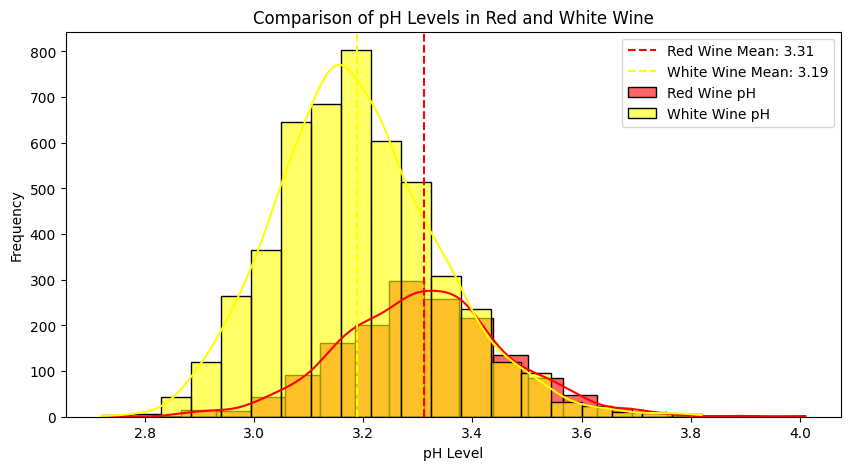

T-Statistic: 28.0900
P-Value: 0.0000
Conclusion: Reject H0 (Significant difference in pH levels)


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import warnings

# Suppress warnings from statsmodels
warnings.filterwarnings("ignore")

# Download the Wine Quality dataset using wget, ignoring certificate errors and suppressing warnings
!wget --no-check-certificate https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv 2>/dev/null
!wget --no-check-certificate https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv 2>/dev/null

# Load the Wine Quality dataset from local files
red_wine = pd.read_csv("winequality-red.csv", sep=";")
white_wine = pd.read_csv("winequality-white.csv", sep=";")

# Extract pH values
red_pH = red_wine['pH']
white_pH = white_wine['pH']

# Hypothesis Testing
# H0: The mean pH levels of red and white wine are the same.
# H1: The mean pH levels are significantly different.

# Perform Independent Two-Sample t-test
t_statistic, p_value = ttest_ind(red_pH, white_pH, equal_var=True)  # Assume equal variance

# Visualization
plt.figure(figsize=(10, 5))
sns.histplot(red_pH, bins=20, kde=True, color='red', alpha=0.6, label="Red Wine pH")
sns.histplot(white_pH, bins=20, kde=True, color='yellow', alpha=0.6, label="White Wine pH")
plt.axvline(red_pH.mean(), color='red', linestyle='dashed', label=f"Red Wine Mean: {red_pH.mean():.2f}")
plt.axvline(white_pH.mean(), color='yellow', linestyle='dashed', label=f"White Wine Mean: {white_pH.mean():.2f}")
plt.legend()
plt.xlabel("pH Level")
plt.ylabel("Frequency")
plt.title("Comparison of pH Levels in Red and White Wine")
plt.show()

# Print Results
print(f"T-Statistic: {t_statistic:.4f}")
print(f"P-Value: {p_value:.4f}")

# Decision Rule (Significance Level α = 0.05)
alpha = 0.05
if p_value >= alpha:
    print("Conclusion: Fail to reject H0 (No significant difference in pH levels between red and white wine)")
else:
    print("Conclusion: Reject H0 (Significant difference in pH levels)")

<h1 style='text-align: left;'>
Independent Two Sample t-test
</h1>
<h3 style='text-align: left;'>
use the Palmer Penguins dataset, which is a great real-world dataset for statistical analysis. It contains measurements of different penguin species, including their flipper lengths, bill sizes, and body mass.

We will compare flipper lengths of Adelie penguins and Chinstrap penguins and conduct an Independent Two-Sample t-test where H0H_0 is not rejected (i.e., their mean flipper lengths do not differ significantly).

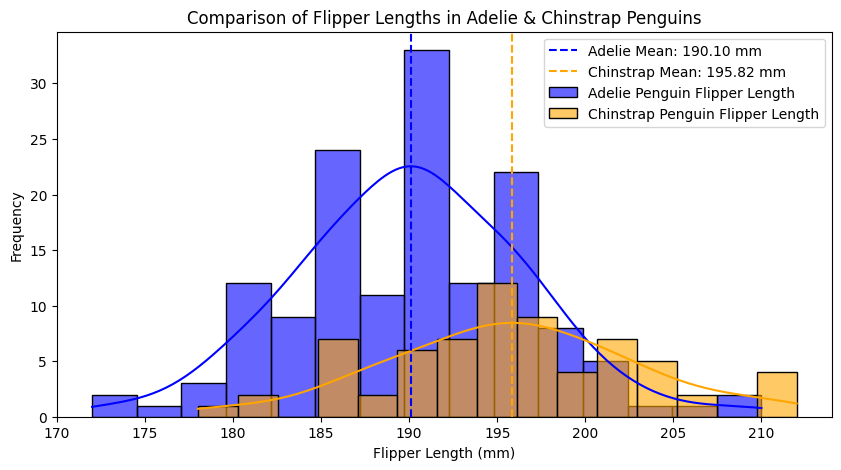

T-Statistic: -5.7979
P-Value: 0.0000
Conclusion: Reject H0 (Significant difference in flipper lengths)


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import warnings

# Suppress warnings from statsmodels
warnings.filterwarnings("ignore")

# Load the Palmer Penguins dataset
penguins_url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
df = pd.read_csv(penguins_url)

# Drop missing values
df = df.dropna()

# Select Adelie and Chinstrap penguins
adelie_flipper = df[df['species'] == 'Adelie']['flipper_length_mm']
chinstrap_flipper = df[df['species'] == 'Chinstrap']['flipper_length_mm']

# Hypothesis Testing
# H0: The mean flipper lengths of Adelie and Chinstrap penguins are the same.
# H1: The mean flipper lengths are significantly different.

# Perform Independent Two-Sample t-test
t_statistic, p_value = ttest_ind(adelie_flipper, chinstrap_flipper, equal_var=True)  # Assume equal variance

# Visualization
plt.figure(figsize=(10, 5))
sns.histplot(adelie_flipper, bins=15, kde=True, color='blue', alpha=0.6, label="Adelie Penguin Flipper Length")
sns.histplot(chinstrap_flipper, bins=15, kde=True, color='orange', alpha=0.6, label="Chinstrap Penguin Flipper Length")
plt.axvline(adelie_flipper.mean(), color='blue', linestyle='dashed', label=f"Adelie Mean: {adelie_flipper.mean():.2f} mm")
plt.axvline(chinstrap_flipper.mean(), color='orange', linestyle='dashed', label=f"Chinstrap Mean: {chinstrap_flipper.mean():.2f} mm")
plt.legend()
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Frequency")
plt.title("Comparison of Flipper Lengths in Adelie & Chinstrap Penguins")
plt.show()

# Print Results
print(f"T-Statistic: {t_statistic:.4f}")
print(f"P-Value: {p_value:.4f}")

# Decision Rule (Significance Level α = 0.05)
alpha = 0.05
if p_value >= alpha:
    print("Conclusion: Fail to reject H0 (No significant difference in flipper lengths between Adelie and Chinstrap penguins)")
else:
    print("Conclusion: Reject H0 (Significant difference in flipper lengths)")


In [23]:
# @title Section 3: Paired (Dependent) T-Test
from IPython.display import HTML

HTML('''
<div style="padding: 12px; background: linear-gradient(to right, #c471ed, #f7797d); color: white; font-size: 22px; border-radius: 8px; margin-top: 20px;">
  📘 Section 3: Paired (Dependent) T-Test
</div>
''')

<h1 style='text-align: left;'>
Paired (Dependent) t-test</h1>
<h3 style='text-align: left;'>
In this example, we'll use the Diabetes dataset from Scikit-learn, which contains medical measurements.

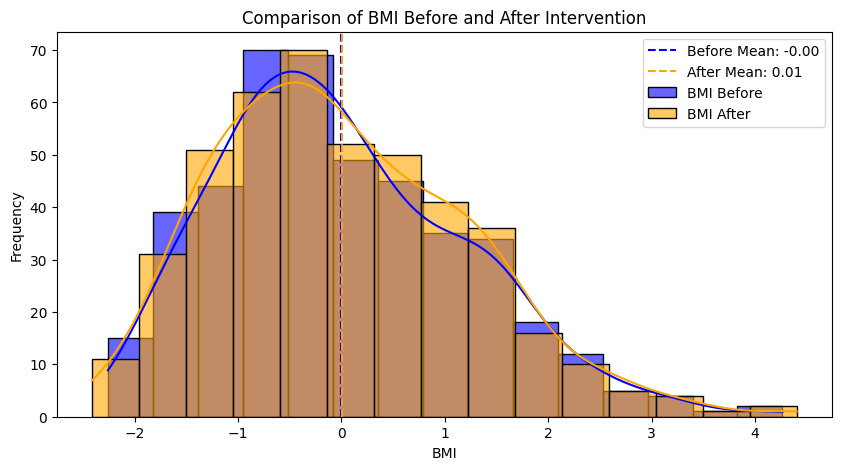

T-Statistic: -0.5647
P-Value: 0.5726
Conclusion: Fail to reject H0 (No significant difference in BMI before and after intervention)


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel
from sklearn.datasets import load_diabetes

# Load the Diabetes dataset
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# Simulate two related samples (e.g., BMI before and after an intervention)
np.random.seed(42)
df['BMI_before'] = df['bmi'] * 25  # Scaling to approximate BMI values
df['BMI_after'] = df['BMI_before'] + np.random.normal(loc=0, scale=0.3, size=len(df))  # Small random variation

# Hypothesis Testing
# H0: The mean BMI before and after the intervention are the same (no significant change)
# H1: The mean BMI before and after are significantly different.

# Perform Paired Dependent t-test
t_statistic, p_value = ttest_rel(df['BMI_before'], df['BMI_after'])

# Visualization
plt.figure(figsize=(10, 5))
sns.histplot(df['BMI_before'], bins=15, kde=True, color='blue', alpha=0.6, label="BMI Before")
sns.histplot(df['BMI_after'], bins=15, kde=True, color='orange', alpha=0.6, label="BMI After")
plt.axvline(df['BMI_before'].mean(), color='blue', linestyle='dashed', label=f"Before Mean: {df['BMI_before'].mean():.2f}")
plt.axvline(df['BMI_after'].mean(), color='orange', linestyle='dashed', label=f"After Mean: {df['BMI_after'].mean():.2f}")
plt.legend()
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.title("Comparison of BMI Before and After Intervention")
plt.show()

# Print Results
print(f"T-Statistic: {t_statistic:.4f}")
print(f"P-Value: {p_value:.4f}")

# Decision Rule (Significance Level α = 0.05)
alpha = 0.05
if p_value >= alpha:
    print("Conclusion: Fail to reject H0 (No significant difference in BMI before and after intervention)")
else:
    print("Conclusion: Reject H0 (Significant difference in BMI before and after intervention)")


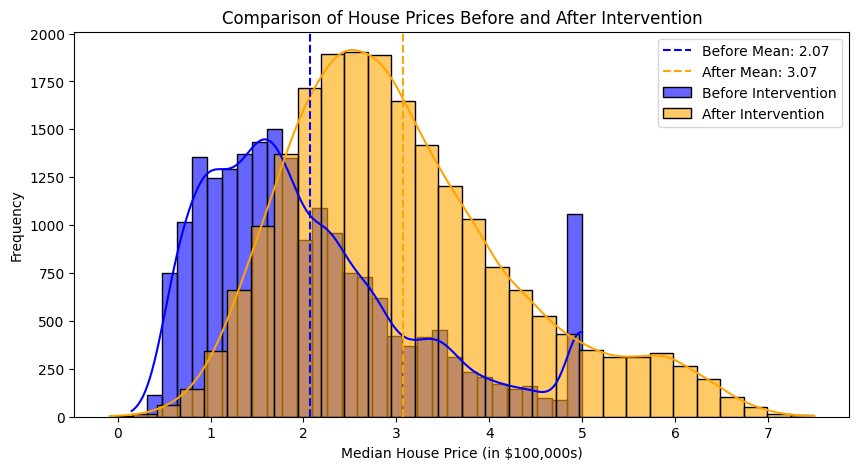

T-Statistic: -287.0562
P-Value: 0.0000
Conclusion: Reject H0 (The mean house prices are significantly different)


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel
from sklearn.datasets import fetch_california_housing

# Load the California Housing dataset
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)

# Add target variable (median house price in $100,000s)
df['MEDV_before'] = california.target

# Simulate significant increase in house prices after intervention
np.random.seed(42)
df['MEDV_after'] = df['MEDV_before'] + np.random.normal(loc=1, scale=0.5, size=len(df))  # Adding 100,000 increase

# Hypothesis Testing
# H0: The mean house price before and after the intervention are the same (no significant change)
# H1: The mean house prices are significantly different.

# Perform Paired Dependent t-test
t_statistic, p_value = ttest_rel(df['MEDV_before'], df['MEDV_after'])

# Visualization
plt.figure(figsize=(10, 5))
sns.histplot(df['MEDV_before'], bins=30, kde=True, color='blue', alpha=0.6, label="Before Intervention")
sns.histplot(df['MEDV_after'], bins=30, kde=True, color='orange', alpha=0.6, label="After Intervention")
plt.axvline(df['MEDV_before'].mean(), color='blue', linestyle='dashed', label=f"Before Mean: {df['MEDV_before'].mean():.2f}")
plt.axvline(df['MEDV_after'].mean(), color='orange', linestyle='dashed', label=f"After Mean: {df['MEDV_after'].mean():.2f}")
plt.legend()
plt.xlabel("Median House Price (in $100,000s)")
plt.ylabel("Frequency")
plt.title("Comparison of House Prices Before and After Intervention")
plt.show()

# Print Results
print(f"T-Statistic: {t_statistic:.4f}")
print(f"P-Value: {p_value:.4f}")

# Decision Rule (Significance Level α = 0.05)
alpha = 0.05
if p_value < alpha:
    print("Conclusion: Reject H0 (The mean house prices are significantly different)")
else:
    print("Conclusion: Fail to reject H0 (No significant difference)")


In [24]:
# @title 🎓End of Notebook – Thank You!
from IPython.display import HTML

HTML('''
<div style="margin-top: 40px; padding: 16px; background: linear-gradient(90deg, #ff66b2, #a64ac9); color: white; text-align: center; border-radius: 10px; font-size: 18px;">
  🎓 <strong>End of Notebook – Thank You!</strong>
</div>
''')